In [1]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users_df = pd.read_csv('USER_TAKEHOME.csv')

In [3]:
# Start with users dataset

# Display basic information about the datasets
# This helps understand the structure, data types, and identify potential issues
print("--- Users Dataset Info ---")
print(users_df.info()) # Check data types and non-null counts
print("\n--- Preview Dataset ---")
print(users_df.head()) # Preview the first few rows

--- Users Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 2.3+ MB
None

--- Preview Dataset ---
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  fe

In [4]:
# Check for missing values in each dataset
# This helps identify columns that may need cleaning or imputation
print("--- Missing Values in Users Dataset ---")
print(users_df.isnull().sum())

--- Missing Values in Users Dataset ---
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [5]:
# Check for duplicate entries
# Duplicate records can skew analysis results
print("--- Duplicate Records ---")
print(f"Duplicate Rows: {users_df.duplicated().sum()}")
print(f"Duplicate IDs: {users_df['ID'].duplicated().sum()}")
# print(f"Duplicate IDs: {users_df.duplicated(subset='ID').sum()}")

# Exclude entirely null rows before checking for duplicates
users_duplicate_rows = users_df[users_df.notna().any(axis=1)].duplicated().sum()
print(f"Duplicate Rows (excluding null rows): {users_duplicate_rows}")

# Exclude null IDs before checking for duplicates
users_duplicate_ids = users_df[users_df['ID'].notna()]['ID'].duplicated().sum()
print(f"Duplicate IDs (excluding nulls): {users_duplicate_ids}")

--- Duplicate Records ---
Duplicate Rows: 0
Duplicate IDs: 0
Duplicate Rows (excluding null rows): 0
Duplicate IDs (excluding nulls): 0


In [6]:
# Identify unique IDs
print("--- Unique ID count w/ 10 sample ---")
print(users_df['ID'].nunique())
# unique_ids_with_nan = users_df['ID'].nunique(dropna=False) # Including null
print(users_df['ID'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique values in key categorical columns
# To spot inconsistencies or unexpected categories
print("\n--- Unique STATE values ---")
print(users_df['STATE'].drop_duplicates().sort_values(na_position='first').values)
print("\n--- Unique LANGUAGE values ---")
print(users_df['LANGUAGE'].drop_duplicates().sort_values(na_position='first').values)
print("\n--- Unique GENDER values ---")
print(users_df['GENDER'].drop_duplicates().sort_values(na_position='first').values)  # Inconsistent labeling

--- Unique ID count w/ 10 sample ---
100000
['5351b1efe4b0e3638af82697' '536178cfe4b012a86bd734f0'
 '5364098ae4b0a1ed6a0c2f85' '536409c8e4b060d2e95bb71b'
 '53640a0ee4b060d2e95bb7a9' '53640a2fe4b0a1ed6a0c3165'
 '53640cd9e4b0a1ed6a0c3478' '53640d29e4b080191b6425da'
 '53640d8fe4b080191b64276a' '53640d96e4b080191b642781']

--- Unique STATE values ---
[nan 'AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']

--- Unique LANGUAGE values ---
[nan 'en' 'es-419']

--- Unique GENDER values ---
[nan "My gender isn't listed" 'Non-Binary' 'Prefer not to say' 'female'
 'male' 'non_binary' 'not_listed' 'not_specified' 'prefer_not_to_say'
 'transgender' 'unknown']


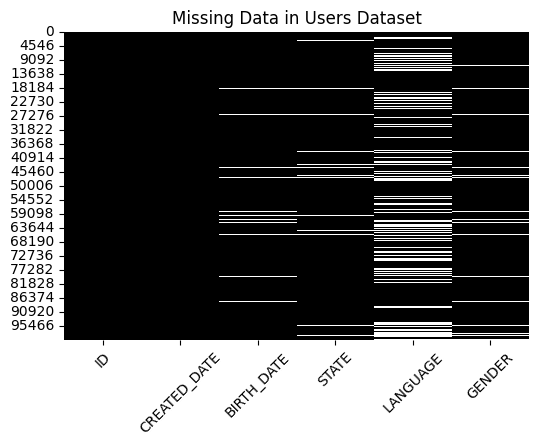

In [7]:
# Visualize missing data using heatmaps
# Heatmaps help to quickly identify patterns in missing data
plt.figure(figsize=(6, 4))
sns.heatmap(users_df.isnull(), cbar=False, cmap='cubehelix', xticklabels=True)
plt.title('Missing Data in Users Dataset')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Second, let's work on transactions dataset

# Display basic information about the datasets
# This helps understand the structure, data types, and identify potential issues
print("--- Transactions Dataset Info ---")
print(transactions_df.info()) # Check data types and non-null counts
print("\n--- Preview Dataset ---")
print(transactions_df.head()) # Preview the first few rows

--- Transactions Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.7+ MB
None

--- Preview Dataset ---
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1  

In [9]:
# Check for missing values in each dataset
# This helps identify columns that may need cleaning or imputation
print("--- Missing Values in Transactions Dataset ---")
print(transactions_df.isnull().sum())

--- Missing Values in Transactions Dataset ---
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [10]:
# Check for duplicate entries
# Duplicate records can skew analysis results
print("--- Duplicate Records ---")
print(f"Duplicate Rows: {transactions_df.duplicated().sum()}")
print(f"Duplicate RECEIPT IDs: {transactions_df['RECEIPT_ID'].duplicated().sum()}")

# Exclude entirely null rows before checking for duplicates
transactions_duplicate_rows = transactions_df[transactions_df.notna().any(axis=1)].duplicated().sum()
print(f"Duplicate Rows (excluding null rows): {transactions_duplicate_rows}")

# Exclude null IDs before checking for duplicates
transactions_duplicate_ids = transactions_df[transactions_df['RECEIPT_ID'].notna()]['RECEIPT_ID'].duplicated().sum()
print(f"Duplicate RECEIPT IDs (excluding nulls): {transactions_duplicate_ids}")

--- Duplicate Records ---
Duplicate Rows: 171
Duplicate RECEIPT IDs: 25560
Duplicate Rows (excluding null rows): 171
Duplicate RECEIPT IDs (excluding nulls): 25560


In [11]:
# Find RECEIPT_IDs that appear only once
unique_receipt_ids = transactions_df['RECEIPT_ID'].value_counts()
single_occurrence_ids = unique_receipt_ids[unique_receipt_ids == 1].index

# Filter transactions with these unique RECEIPT_IDs
single_occurrence_records = transactions_df[transactions_df['RECEIPT_ID'].isin(single_occurrence_ids)]

print(f"Number of RECEIPT_IDs with only one record: {len(single_occurrence_ids)}")

Number of RECEIPT_IDs with only one record: 0


In [12]:
# Identify unique Receipt IDs
print("--- Unique RECEIPT_ID count w/ 10 sample ---")
print(transactions_df['RECEIPT_ID'].nunique())
print(transactions_df['RECEIPT_ID'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique User IDs
print("\n--- Unique USER_ID count w/ 10 sample ---")
print(transactions_df['USER_ID'].nunique())
print(transactions_df['USER_ID'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique Barcodes
print("\n--- Unique BARCODE count w/ 10 sample ---")
print(transactions_df['BARCODE'].nunique())
print(transactions_df['BARCODE'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique values in key categorical columns
# To spot inconsistencies or unexpected categories
print("\n--- Unique STORE_NAME count w/ 10 sample ---")
print(transactions_df['STORE_NAME'].nunique())
print(transactions_df['STORE_NAME'].drop_duplicates().sort_values(na_position='first').values[:10])

print("\n--- Unique FINAL_QUANTITY values ---")
print(transactions_df['FINAL_QUANTITY'].drop_duplicates().sort_values(na_position='first').values) # String zero
print("\n--- Unique FINAL_SALE values ---")
print(transactions_df['FINAL_SALE'].drop_duplicates().sort_values(na_position='first').values)  # Blank values

--- Unique RECEIPT_ID count w/ 10 sample ---
24440
['0000d256-4041-4a3e-adc4-5623fb6e0c99'
 '0001455d-7a92-4a7b-a1d2-c747af1c8fd3'
 '00017e0a-7851-42fb-bfab-0baa96e23586'
 '000239aa-3478-453d-801e-66a82e39c8af'
 '00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1'
 '0002d8cd-1701-4cdd-a524-b70402e2dbc0'
 '000550b2-1480-4c07-950f-ff601f242152'
 '00096c49-8b04-42f9-88ce-941c5e06c4a7'
 '000e1d35-15e5-46c6-b6b3-33653ed3d27e'
 '0010d87d-1ad2-4e5e-9a25-cec736919d15']

--- Unique USER_ID count w/ 10 sample ---
17694
['53ce6404e4b0459d949f33e9' '548e5dfae4b096ae8875dfec'
 '56242219e4b07364e3e0bef4' '5640f111e4b0a905f487f861'
 '5748f001e4b03a732e4ecdc0' '5751fbefe4b008fae9acab39'
 '575431e2e4b008fae9ad26e1' '5769c316e4b0ba1ab70e8648'
 '579408e9e4b06c424fdff0ad' '57adea34e4b0b3b7cade6c1b']

--- Unique BARCODE count w/ 10 sample ---
11027
[        nan -1.0000e+00  2.2260e+03  3.1059e+04  3.1073e+04  3.3749e+04
  4.0136e+04  4.0945e+04  4.2185e+04  4.5605e+04]

--- Unique STORE_NAME count w/ 10 sample ---
954
[

In [13]:
# Deep dive into Final Sale values
print("--- FINAL_SALE Deep Dive ---")

# Count empty strings in FINAL_QUANTITY column
blank_count = (transactions_df['FINAL_SALE'] == '').sum()
print(f"Number of blank values in FINAL_SALE: {blank_count}")

# Count values that are just spaces or other whitespace characters
whitespace_count = transactions_df['FINAL_SALE'].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
print(f"Number of whitespace-only values in FINAL_SALE: {whitespace_count}")

--- FINAL_SALE Deep Dive ---
Number of blank values in FINAL_SALE: 0
Number of whitespace-only values in FINAL_SALE: 12500


<ipython-input-14-8c2748389ae1>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = transactions_df.applymap(


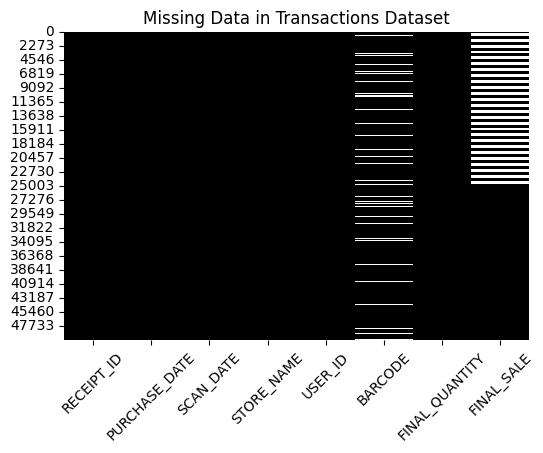

In [14]:
# Create a mask for missing data: NaN or whitespace-only strings
missing_mask = transactions_df.applymap(
    lambda x: pd.isna(x) or (isinstance(x, str) and x.strip() == '')
)

# Visualize missing data with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(missing_mask, cbar=False, cmap='cubehelix', xticklabels=True)
plt.title('Missing Data in Transactions Dataset')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Thrid is the products dataset.

# Display basic information about the datasets
# This helps understand the structure, data types, and identify potential issues
print("--- Products Dataset Info ---")
print(products_df.info()) # Check data types and non-null counts
print("\n--- Preview Dataset ---")
print(products_df.head()) # Preview the first few rows

--- Products Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 25.8+ MB
None

--- Preview Dataset ---
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste

In [16]:
# Check for missing values in each dataset
# This helps identify columns that may need cleaning or imputation
print("--- Missing Values in Products Dataset ---")
print(products_df.isnull().sum())

--- Missing Values in Products Dataset ---
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [17]:
# Check for duplicate entries
# Duplicate records can skew analysis results
print("--- Duplicate Records ---")
print(f"Duplicate Rows: {products_df.duplicated().sum()}")
print(f"Duplicate BARCODEs: {products_df['BARCODE'].duplicated().sum()}")

# Exclude entirely null rows before checking for duplicates
products_duplicate_rows = products_df[products_df.notna().any(axis=1)].duplicated().sum()
print(f"Duplicate Rows (excluding null rows): {products_duplicate_rows}")

# Exclude null IDs before checking for duplicates
products_duplicate_barcodes = products_df[products_df['BARCODE'].notna()]['BARCODE'].duplicated().sum()
print(f"Duplicate BARCODEs (excluding nulls): {products_duplicate_barcodes}")

--- Duplicate Records ---
Duplicate Rows: 215
Duplicate BARCODEs: 4209
Duplicate Rows (excluding null rows): 215
Duplicate BARCODEs (excluding nulls): 185


In [18]:
# Excluding 1st occurrence
print("--- Duplicates Deep Dive (excluding 1st occurrence) ---")

# 1️⃣ Identify Duplicate Rows (excluding fully null rows) - Only SECOND Occurrences
duplicate_rows_p2 = products_df[products_df.notna().any(axis=1)]  # Exclude fully null rows
duplicate_rows_p2 = duplicate_rows_p2[duplicate_rows_p2.duplicated(keep='first')]  # Keep only 2nd+ occurrences

# 2️⃣ Identify Duplicate BARCODE Entries (excluding null BARCODEs) - Only SECOND Occurrences
duplicate_barcodes_p2 = products_df[products_df['BARCODE'].notna()]  # Exclude null BARCODEs
duplicate_barcodes_p2 = duplicate_barcodes_p2[duplicate_barcodes_p2['BARCODE'].duplicated(keep='first')]  # Keep only 2nd+ occurrences

# 3️⃣ Find Intersection: Rows that are BOTH duplicate rows and have duplicate BARCODEs
intersection_p2 = pd.merge(duplicate_rows_p2, duplicate_barcodes_p2, how='inner')

# 4️⃣ Check Counts
print(f"Duplicate Rows (2nd+ occurrences, excluding null rows): {len(duplicate_rows_p2)}")
print(f"Duplicate BARCODEs (2nd+ occurrences, excluding nulls): {len(duplicate_barcodes_p2)}")
print(f"Intersection (both duplicate rows & duplicate BARCODEs): {len(intersection_p2)}")

--- Duplicates Deep Dive (excluding 1st occurrence) ---
Duplicate Rows (2nd+ occurrences, excluding null rows): 215
Duplicate BARCODEs (2nd+ occurrences, excluding nulls): 185
Intersection (both duplicate rows & duplicate BARCODEs): 158


In [19]:
# Identify unique CATEGORY_1s
print("--- Unique CATEGORY_1 count w/ 10 sample ---")
print(products_df['CATEGORY_1'].nunique())
print(products_df['CATEGORY_1'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique CATEGORY_2s
print("\n--- Unique CATEGORY_2 count w/ 10 sample ---")
print(products_df['CATEGORY_2'].nunique())
print(products_df['CATEGORY_2'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique CATEGORY_3s
print("\n--- Unique CATEGORY_3 count w/ 10 sample ---")
print(products_df['CATEGORY_3'].nunique())
print(products_df['CATEGORY_3'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique CATEGORY_4s
print("\n--- Unique CATEGORY_4 count w/ 10 sample ---")
print(products_df['CATEGORY_4'].nunique())
print(products_df['CATEGORY_4'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique MANUFACTURERs
print("\n--- Unique MANUFACTURER count w/ 10 sample ---")
print(products_df['MANUFACTURER'].nunique())
print(products_df['MANUFACTURER'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique BRANDs
print("\n--- Unique BRAND count w/ 10 sample ---")
print(products_df['BRAND'].nunique())
print(products_df['BRAND'].drop_duplicates().sort_values(na_position='first').values[:10])

# Identify unique BARCODEs
print("\n--- Unique BARCODE count w/ 10 sample ---")
print(products_df['BARCODE'].nunique())
print(products_df['BARCODE'].drop_duplicates().sort_values(na_position='first').values[:10])

--- Unique CATEGORY_1 count w/ 10 sample ---
27
[nan 'Alcohol' 'Animals & Pet Supplies' 'Apparel & Accessories'
 'Arts & Entertainment' 'Baby & Toddler' 'Beauty' 'Beverages' 'Dairy'
 'Deli & Bakery']

--- Unique CATEGORY_2 count w/ 10 sample ---
121
[nan 'Adult Incontinence' 'Arcade Equipment & Accessories' 'Arts & Crafts'
 'Athletics' 'Audio' 'Baby & Toddler Feeding'
 'Baby Toys & Activity Equipment' 'Baby Transport' 'Bath & Body']

--- Unique CATEGORY_3 count w/ 10 sample ---
344
[nan 'AV Carts' 'Acne Treatments & Kits' 'Activewear'
 'Adult Incontinence Bladder Supports' 'Adult Incontinence Furniture Pads'
 'Adult Incontinence Liners' 'Adult Incontinence Pads'
 'Adult Incontinence Underwear' 'After Shave']

--- Unique CATEGORY_4 count w/ 10 sample ---
127
[nan 'Already Popped Popcorn' 'American Lager'
 'Anti Diarrheal Medicines & Treatments' 'Astringents'
 'Baby & Toddler Outfits' 'Baby & Toddler Socks & Tights'
 'Baby & Toddler Tops' 'Beverage Warmers' 'Bottle Caps']

--- Unique MAN

In [21]:
# Count occurrences of 'NONE' and 'PLACEHOLDER' in BRAND and MANUFACTURER columns
none_values_brand = products_df['BRAND'].str.contains('NONE', na=False, case=False).sum()
none_values_manufacturer = products_df['MANUFACTURER'].str.contains('NONE', na=False, case=False).sum()

placeholder_values_brand = products_df['BRAND'].str.contains('PLACEHOLDER', na=False, case=False).sum()
placeholder_values_manufacturer = products_df['MANUFACTURER'].str.contains('PLACEHOLDER', na=False, case=False).sum()

print("--- Placeholders/Inconsistency in BRAND & MANUFACTURER ---")
print(f"'NONE' in BRAND: {none_values_brand}")
print(f"'NONE' in MANUFACTURER: {none_values_manufacturer}")
print(f"'PLACEHOLDER' in BRAND: {placeholder_values_brand}")
print(f"'PLACEHOLDER' in MANUFACTURER: {placeholder_values_manufacturer}")

--- Placeholders/Inconsistency in BRAND & MANUFACTURER ---
'NONE' in BRAND: 0
'NONE' in MANUFACTURER: 4973
'PLACEHOLDER' in BRAND: 0
'PLACEHOLDER' in MANUFACTURER: 86902


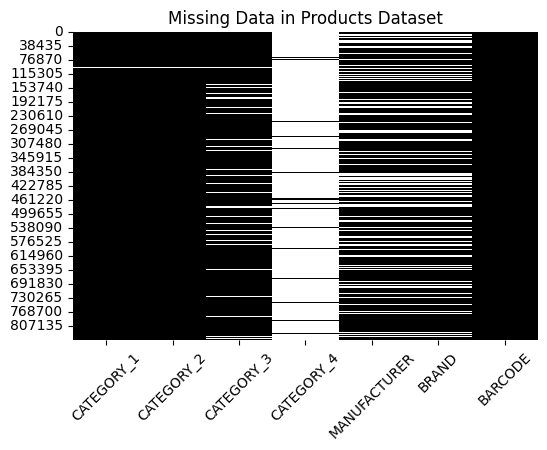

In [22]:
# Visualize missing data using heatmaps
# Heatmaps help to quickly identify patterns in missing data
plt.figure(figsize=(6, 4))
sns.heatmap(products_df.isnull(), cbar=False, cmap='cubehelix', xticklabels=True)
plt.title('Missing Data in Products Dataset')
plt.xticks(rotation=45)
plt.show()

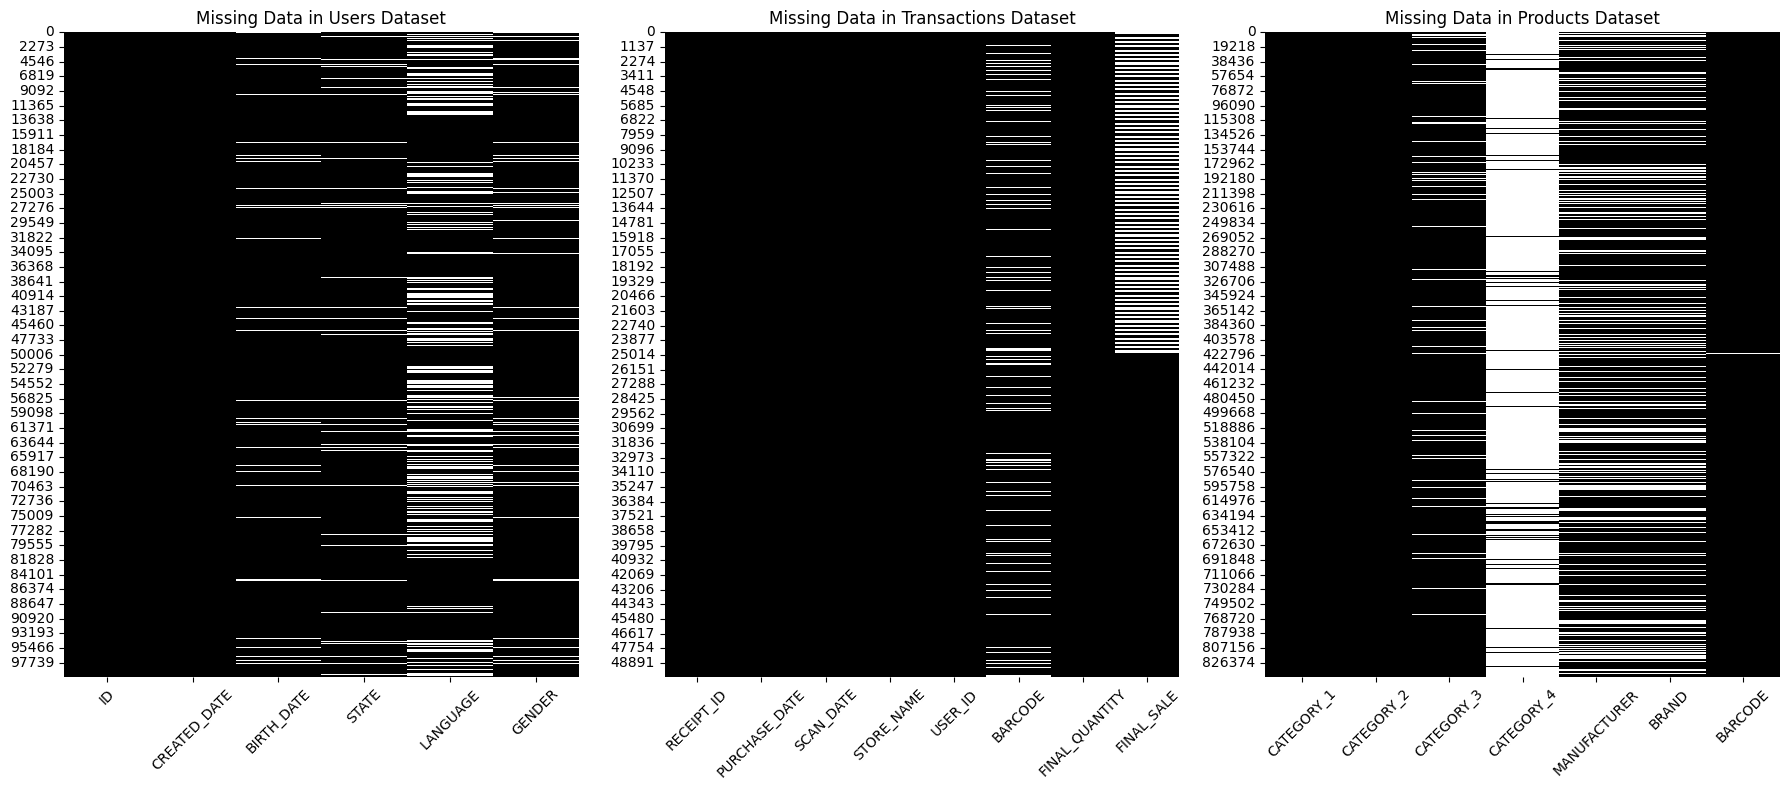

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plot Missing Data Heatmap for Users Dataset
sns.heatmap(users_df.isnull(), cbar=False, cmap='cubehelix', ax=axes[0])
axes[0].set_title('Missing Data in Users Dataset')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot Missing Data Heatmap for Transactions Dataset
sns.heatmap(missing_mask, cbar=False, cmap='cubehelix', ax=axes[1])
axes[1].set_title('Missing Data in Transactions Dataset')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Plot Missing Data Heatmap for Products Dataset
sns.heatmap(products_df.isnull(), cbar=False, cmap='cubehelix', ax=axes[2])
axes[2].set_title('Missing Data in Products Dataset')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()